In [1]:
library("here")
library(devtools)
library(Seurat)

load_all('/home/jpm73279/Socrates')

here() starts at /home/jpm73279/Mendieta_et_al_comparative_single_cell

Loading required package: usethis

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

ℹ Loading Socrates

Loading required package: cicero

Loading required package: monocle

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, 

In [2]:
# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/"
ann <- paste0(reference_genome_path,"Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3")
chr <- paste0(reference_genome_path,"Zm-B73-REFERENCE-NAM-5.0.chrom.size")

In [9]:
Uro_P1.rep1 <- paste0(analysis_path, "Zm_rep1.merged.unique.mpq10.tn5.bed")

# set-up arguments
pre <- "Zm.rep1"

In [10]:
#Load Object
Uro_P1.leaf.rep1 <- loadBEDandGenomeData(Uro_P1.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm_rep1.merged.unique.mpq10.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data



In [11]:
# call ACRs
sb_temp_dir <- paste0(analysis_path, "Zm.leaf.rep1.tmp")
Uro_P1.leaf.rep1.acrs <- callACRs(Uro_P1.leaf.rep1, genomesize=1.6e9,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

 - running MACS2 on bulk BED file ...



In [12]:
Uro_P1.leaf.rep1.meta <- buildMetaData(Uro_P1.leaf.rep1.acrs,
                                     tss.window=2000,
                                     verbose=TRUE)

 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...



Making Dotplot



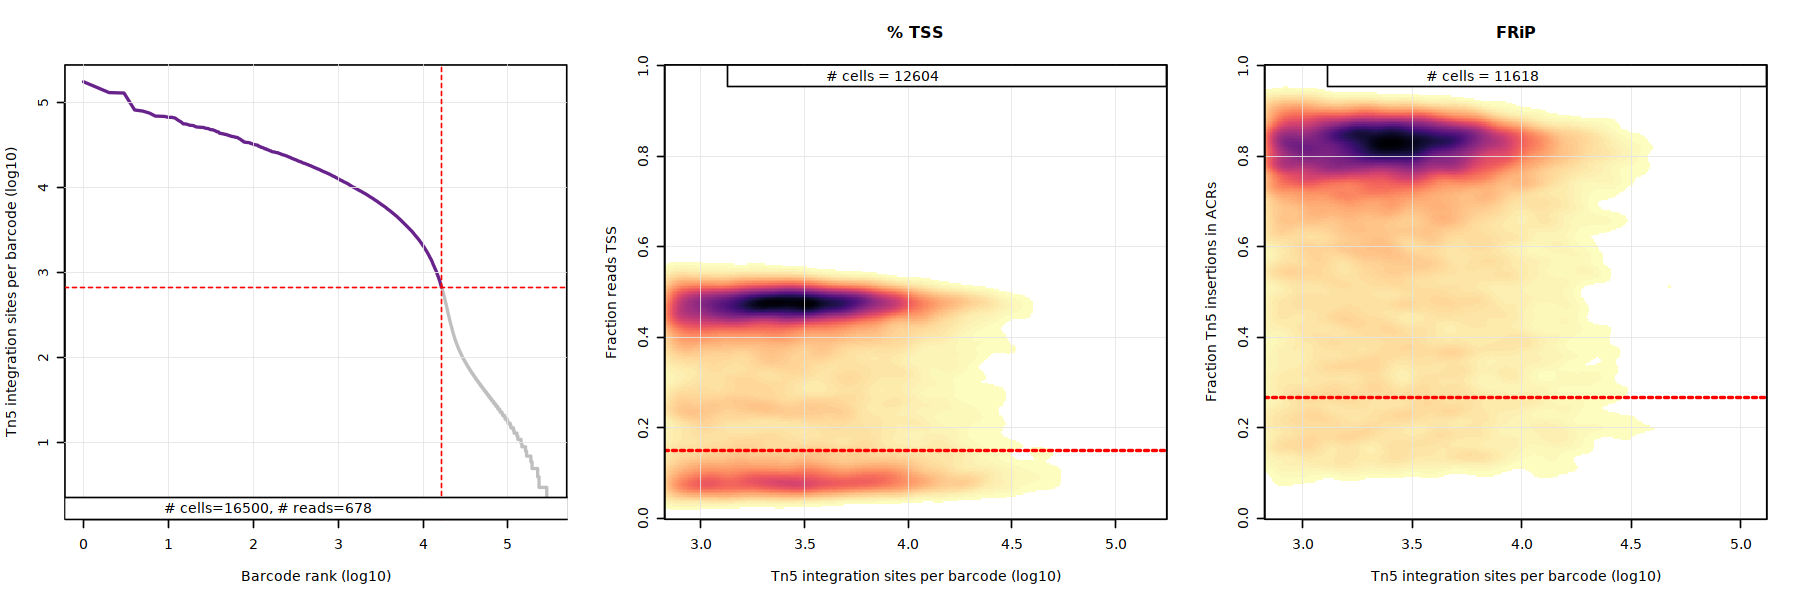

In [24]:
library(repr)

options(repr.plot.width=15, repr.plot.height=5)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=16500,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=NULL)


In [27]:
library(repr)
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/QC_output/imgs/"
pre <- "zea_mays.sciATAC_rep1"


options(repr.plot.width=15, repr.plot.height=5)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=16500,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=paste0(output_path_imgs, pre))


Making Dotplot



In [28]:
# generate sparse matrix
Uro_P1.leaf.rep1.meta_file.filtered <- generateMatrix(Uro_P1.leaf.rep1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

In [31]:
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/"
pre <- "zea_mays.sciATAC_rep1"
# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Uro_P1.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Uro_P1.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)

 - converting triplet format to sparseMatrix



## Rep 2

In [3]:
Uro_P1.rep2 <- paste0(analysis_path, "Zm_rep2.merged.unique.mpq10.tn5.bed")

#Load Object
Uro_P1.leaf.rep2 <- loadBEDandGenomeData(Uro_P1.rep2, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm_rep2.merged.unique.mpq10.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data



In [4]:
# call ACRs
sb_temp_dir <- paste0(analysis_path, "Zm.leaf.rep2.tmp")
Uro_P1.leaf.rep2.acrs <- callACRs(Uro_P1.leaf.rep2, genomesize=1.6e9,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)


Uro_P1.leaf.rep2.meta <- buildMetaData(Uro_P1.leaf.rep2.acrs,
                                     tss.window=2000,
                                     verbose=TRUE)

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm.leaf.rep2.tmp' already exists"
 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...



Making Dotplot



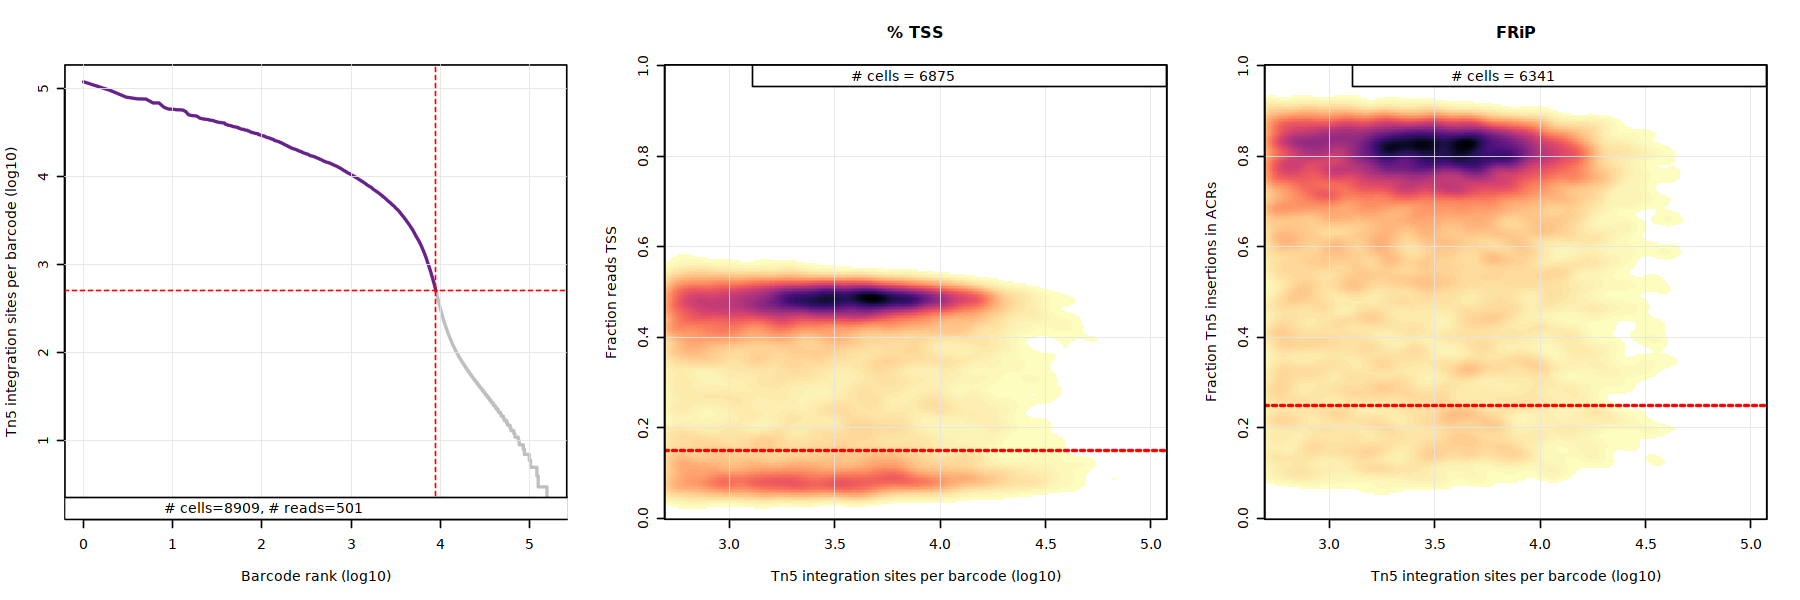

In [6]:
library(repr)

options(repr.plot.width=15, repr.plot.height=5)
Uro_P1.leaf.rep2.meta_file <- findCells(Uro_P1.leaf.rep2.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=9000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=NULL)


In [8]:
library(repr)
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/QC_output/imgs/"
pre <- "zea_mays.sciATAC_rep2"


options(repr.plot.width=15, repr.plot.height=5)
Uro_P1.leaf.rep2.meta_file <- findCells(Uro_P1.leaf.rep2.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=9000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=paste0(output_path_imgs, pre))


Making Dotplot



In [9]:
# generate sparse matrix
Uro_P1.leaf.rep2.meta_file.filtered <- generateMatrix(Uro_P1.leaf.rep2.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

In [10]:
output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/"
pre <- "zea_mays.sciATAC_rep2"
# convert to Socrates format for downstream analysis.-
sb_leaf_rep_2.filtered.sparse <- convertSparseData(Uro_P1.leaf.rep2.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_2.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_2.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Uro_P1.leaf.rep2.meta_file.filtered, file=sb.obj.leaf_rep_2.save)
saveRDS(sb_leaf_rep_2.filtered.sparse, file=sb.soc.leaf_rep_2.save)

 - converting triplet format to sparseMatrix



### For Loop Time...

Okay - this is taking some time, and would be an insane amount of copy and paste. Rather I think I'm just going to forloop this for the rest of these files, and write the QC image to an output. This should be enough for me to go back and then just start either -1 adapting the filters based off of specified plates, or 2 - indicate that a plate is performing far worse. 

In [ ]:
remaining_files_list <- list("Zm_Mo17B73_P2_G031_10x.rep1", "Zm_rep1_P10_10x.rep1", 
                             "Zm_rep1_P1_10x.rep1", "Zm_rep1_P2_10x.rep1", 
                             "Zm_rep1_P3_10x.rep1", "Zm_rep1_P4_10x.rep1", 
                             "Zm_rep1_P5_10x.rep1", "Zm_rep1_P6_10x.rep1", 
                             "Zm_rep1_P7_10x.rep1", "Zm_rep1_P8_10x.rep1", 
                             "Zm_rep1_P9_10x.rep1", "Zm_rep2_P1_10x.rep2", 
                             "Zm_rep2_P2_10x.rep2", "Zm_rep2_P3_10x.rep2", 
                             "Zm_rep2_P4_10x.rep2", "Zm_rep2_P5_10x.rep2", "Zm_rep2_P6_10x.rep2")

for (i in remaining_files_list) {
    
reference_genome_path <- "/home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/"
    
Uro_P1.rep1 <- paste0(analysis_path, paste0(i,".unique.mpq10.tn5.bed"))
ann <- paste0(reference_genome_path,"Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3")
chr <- paste0(reference_genome_path,"Zm-B73-REFERENCE-NAM-5.0.chrom.size")
pre <- i

output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/"
output_path_imgs <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/QC_output/imgs/"

    
#Load Object
Uro_P1.leaf.rep1 <- loadBEDandGenomeData(Uro_P1.rep1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

# call ACRs
sb_temp_dir <- paste0(analysis_path, paste0(pre, "peaks.tmp"))
Uro_P1.leaf.rep1.acrs <- callACRs(Uro_P1.leaf.rep1, genomesize=2.8e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

Uro_P1.leaf.rep1.meta <- buildMetaData(Uro_P1.leaf.rep1.acrs,
                                     tss.window=1000,
                                     verbose=TRUE)



options(repr.plot.width=25, repr.plot.height=10)
Uro_P1.leaf.rep1.meta_file <- findCells(Uro_P1.leaf.rep1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=2000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=.25,
                                        filt.org = FALSE,
                                        prefix=paste0(output_path_imgs, pre))

# generate sparse matrix
Uro_P1.leaf.rep1.meta_file.filtered <- generateMatrix(Uro_P1.leaf.rep1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)


# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(Uro_P1.leaf.rep1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(output_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(Uro_P1.leaf.rep1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)
    
}


Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm_Mo17B73_P2_G031_10x.rep1.unique.mpq10.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm_Mo17B73_P2_G031_10x.rep1peaks.tmp' already exists"
 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...

Maki

 - finalizing meta data creation ...

   ~ returning metadata ...

Making Dotplot

 - converting triplet format to sparseMatrix

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm_rep1_P7_10x.rep1.unique.mpq10.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/Zm-B73-REFERENCE-NAM-5.0.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm_rep1_P7_10x.rep1peaks.tmp' already exists"
 - counting Tn5 sites per barcode ...

 - counting Tn5 sites at TSSs per barcode ...

 - counti

## Get other Meta information for Each Plate

In [3]:
remaining_files_list <- list("Zm_Mo17B73_P2_G031_10x.rep1", "Zm_rep1_P10_10x.rep1", 
                             "Zm_rep1_P1_10x.rep1", "Zm_rep1_P2_10x.rep1", 
                             "Zm_rep1_P3_10x.rep1", "Zm_rep1_P4_10x.rep1", 
                             "Zm_rep1_P5_10x.rep1", "Zm_rep1_P6_10x.rep1", 
                             "Zm_rep1_P7_10x.rep1", "Zm_rep1_P8_10x.rep1", 
                             "Zm_rep1_P9_10x.rep1", "Zm_rep2_P1_10x.rep2", 
                             "Zm_rep2_P2_10x.rep2", "Zm_rep2_P3_10x.rep2", 
                             "Zm_rep2_P4_10x.rep2", "Zm_rep2_P5_10x.rep2", "Zm_rep2_P6_10x.rep2")

output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/"

df <- data.frame(matrix(ncol = 5, nrow = 0))
colnames(df)<-c("plate", "mean_total", "mean_tss", "mean_acrs", "mean_nsites")

for (i in remaining_files_list) {
    output_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/zea_mays/"

    meta_file_reads <- readRDS(paste0(output_path,"QC_output/",i, "_QC_soc_obj.rds"))
    
    mean_total <- (mean(meta_file_reads$meta$total))
    mean_tss <- (mean(meta_file_reads$meta$tss))
    mean_acrs <- mean(meta_file_reads$meta$acrs)
    mean_nSites <- mean(meta_file_reads$meta$nSites)

    combined_row <- c(i, mean_total, mean_tss, mean_acrs, mean_nSites)
    df <- rbind(df,combined_row)

}

In [4]:
df

X.Zm_Mo17B73_P2_G031_10x.rep1.,X.1431.58124174373.,X.429.459709379128.,X.868.393659180978.,X.845.389696169089.
<chr>,<chr>,<chr>,<chr>,<chr>
Zm_Mo17B73_P2_G031_10x.rep1,1431.58124174373,429.459709379128,868.393659180978,845.389696169089
Zm_rep1_P10_10x.rep1,3308.77096483318,1153.94679891794,1694.11181244364,1961.81875563571
Zm_rep1_P1_10x.rep1,3780.60037523452,1381.55159474672,2144.46716697936,2155.5469043152
Zm_rep1_P2_10x.rep1,2558.06575963719,949.069160997732,1402.29705215419,1461.7925170068
Zm_rep1_P3_10x.rep1,4079.86302895323,1452.71158129176,2134.24053452116,2365.31737193764
Zm_rep1_P4_10x.rep1,4845.03678606002,1705.62536302033,2599.74056147144,2788.03678606002
Zm_rep1_P5_10x.rep1,5142.28584310189,1835.70694319206,2870.81965734896,2976.8431018936
Zm_rep1_P6_10x.rep1,4730.31578947368,1654.91099071207,2664.42801857585,2783.66176470588
Zm_rep1_P7_10x.rep1,3690.40354147251,1307.412861137,1957.09692451072,2166.95340167754
